In [1]:
import cv2 as cv
import pywt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#wavelet transform is very effective for feature detectiom images

In [3]:
def w2d(img,mode="haar",level=1):
    imArray=img
    #conversion to grayscale
    imArray=cv.cvtColor(imArray,cv.COLOR_BGR2GRAY)
    
    #conversion to float
    imArray=np.float32(imArray)
    imArray/=255
    
    #wavelet decomposition
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process coeffecients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H
    
    

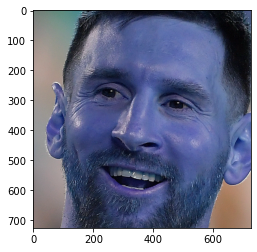

In [4]:
cropped=cv.imread('./dataset/cropped/lionel_messi/lionel_messi11.png')
plt.imshow(cropped)

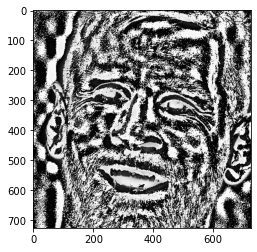

In [5]:
cropped_wt=w2d(cropped,'db10',5)
plt.imshow(cropped_wt,cmap="gray")

In [6]:

import os

In [7]:
cropped_img_dirs=[]
path_to_cr_data="./dataset/cropped/"

for entry in os.scandir(path_to_cr_data):
    cropped_img_dirs.append(entry.path)
cropped_img_dirs


['./dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federar',
 './dataset/cropped/serena_williams',
 './dataset/cropped/virat_kohli']

In [8]:
celebrity_file_names_dict=dict()

for img_dir in cropped_img_dirs:
    celebrity_name=img_dir.split("/")[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    if celebrity_name not in celebrity_file_names_dict:
        celebrity_file_names_dict[celebrity_name]=file_list
    else:
        celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\\lionel_messi27.png',
  './dataset/cropped/lionel_messi\

In [9]:
class_dict={}

count=0
for names in celebrity_file_names_dict.keys():
    class_dict[names]=count
    count+=1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federar': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [10]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img=cv.imread(training_img)
        scaled_raw_img=cv.resize(img,(32,32))
        img_har=w2d(img,"db1",5)
        scaled_img_har=cv.resize(img_har,(32,32))
        stacked_img=np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(stacked_img)
        y.append(class_dict[celebrity_name])
        
        
  

In [11]:
len(x)

260

In [12]:
len(y)

260

In [13]:
x #each element in x is an img

[array([[ 27],
        [ 17],
        [ 22],
        ...,
        [237],
        [ 31],
        [248]], dtype=uint8),
 array([[118],
        [107],
        [194],
        ...,
        [ 61],
        [236],
        [ 31]], dtype=uint8),
 array([[116],
        [126],
        [120],
        ...,
        [  4],
        [  1],
        [215]], dtype=uint8),
 array([[175],
        [165],
        [141],
        ...,
        [233],
        [ 21],
        [183]], dtype=uint8),
 array([[ 95],
        [ 76],
        [ 89],
        ...,
        [ 58],
        [155],
        [156]], dtype=uint8),
 array([[ 79],
        [ 81],
        [ 81],
        ...,
        [224],
        [  3],
        [252]], dtype=uint8),
 array([[221],
        [193],
        [193],
        ...,
        [  2],
        [  4],
        [ 16]], dtype=uint8),
 array([[ 96],
        [105],
        [114],
        ...,
        [205],
        [  4],
        [  1]], dtype=uint8),
 array([[ 86],
        [ 82],
        [ 71],
        ...

In [14]:
len(x[0]) ##raw =32*32*3 + img_har=32*32 =4096

4096

In [15]:
#float

X=np.array(x).reshape(len(x),4096).astype(float) #every image is 1D array
X.shape

(260, 4096)

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.1,random_state=0)

In [20]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel="rbf",C=10))])
pipe.fit(xtrain,ytrain)
pipe.score(xtest,ytest)

#details on sklearn.pipeline: https://stackoverflow.com/questions/33091376/what-is-exactly-sklearn-pipeline-pipeline

0.8461538461538461

In [21]:
len(xtest)

26

In [22]:
print(classification_report(ytest,pipe.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5
           2       0.71      1.00      0.83         5
           3       0.80      0.67      0.73         6
           4       1.00      0.80      0.89         5

    accuracy                           0.85        26
   macro avg       0.87      0.85      0.85        26
weighted avg       0.87      0.85      0.84        26



In [23]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [24]:
model_params={
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,100],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[5,10,20]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver="liblinear",multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [25]:
import pandas as pd

In [26]:
scores=[]
best_estimators={}

for algo,mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(xtrain,ytrain)
    scores.append(
    {
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo]=clf.best_estimator_
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df
    

model  best_score  \
0                  svm    0.833210   
1        random_forest    0.717946   
2  logistic_regression    0.807586   

                                    best_params  
0        {'svc__C': 1, 'svc__kernel': 'linear'}  
1  {'randomforestclassifier__n_estimators': 20}  
2                  {'logisticregression__C': 1}

In [27]:
best_estimators #best trained model

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=20))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [29]:
best_estimators['svm'].score(xtest,ytest)

0.8846153846153846

In [30]:
best_estimators['random_forest'].score(xtest,ytest)

0.7692307692307693

In [31]:
best_estimators['logistic_regression'].score(xtest,ytest)

0.8846153846153846

In [32]:
best_clf=best_estimators['svm']

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(87.0, 0.5, 'Actual Values')

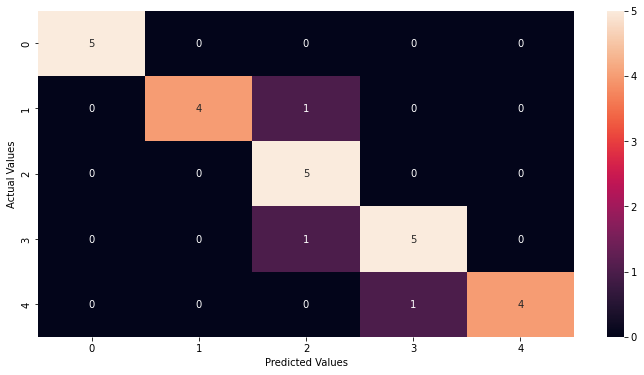

In [34]:
cm=confusion_matrix(ytest,best_clf.predict(xtest))
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [35]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federar': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [36]:
!pip install joblib
import joblib

In [37]:
joblib.dump(best_clf,'saved_model.pkl') #saving best model

['saved_model.pkl']